In [2]:
import zipfile
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.distance import distance
import numpy as np

In [3]:
df1 = pd.read_csv(r"D:\4999 Data\streetview_cleaned.csv")
df2 = pd.read_csv(r"D:\4999 Data\extra-images.csv")
df3 = pd.read_csv(r"D:\4999 Data\subset_lat_long.csv")

In [4]:
combined_df = pd.concat([df1, df2, df3], ignore_index=True)
combined_df["id"] = combined_df["id"].astype("string")
combined_df.to_csv(r"D:\4999 Data\combined.csv", index=False)

In [5]:
combined_df

,id,latitude,longitude
0,D:\4999 Data\street_view\0.png,20.824885,-98.499517
1,D:\4999 Data\street_view\1.png,-3.451752,-54.563937
2,D:\4999 Data\street_view\2.png,-23.496464,-47.460542
3,D:\4999 Data\street_view\3.png,-16.548678,-72.852778
4,D:\4999 Data\street_view\4.png,-35.010870,140.064397
...,...,...,...
112771,D:\4999 Data\01\01\263537312166798.jpg,53.831986,158.323539
112772,D:\4999 Data\00\00\1694141874124124.jpg,53.750100,158.637533
112773,D:\4999 Data\01\01\143109011114992.jpg,65.934055,111.515100
112774,D:\4999 Data\01\01\379850793196401.jpg,62.023757,129.653991


In [13]:
print(combined_df[combined_df.iloc[:, 0].isna()])

Empty DataFrame
Columns: [id, latitude, longitude]
Index: []


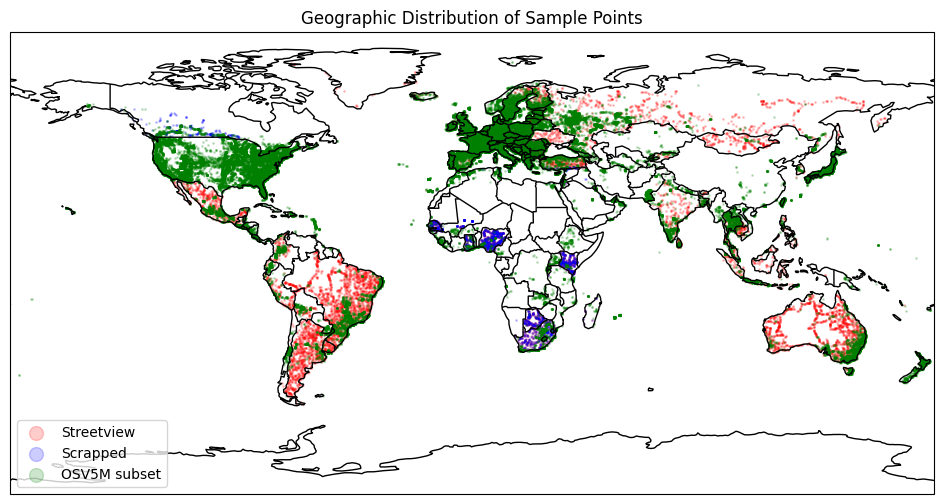

In [24]:
# Set up map with PlateCarree projection
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# Plot points
ax.scatter(df1['longitude'], df1['latitude'], color='red', alpha=0.2,s=1, transform=ccrs.PlateCarree(), label='Streetview')
ax.scatter(df2['longitude'], df2['latitude'], color='blue', alpha=0.2, s=1, transform=ccrs.PlateCarree(), label='Scrapped')
ax.scatter(df3['longitude'], df3['latitude'], color='green', alpha=0.2, s=1, transform=ccrs.PlateCarree(), label='OSV5M subset')

# Add legend
ax.legend(loc='lower left', markerscale=10)

plt.title("Geographic Distribution of Sample Points")
plot_path = r"D:\4999 Data\plots\Train_sample_distribution"
plt.savefig(plot_path, bbox_inches='tight')
plt.show()

Mean Location: (30.19, -1.69)


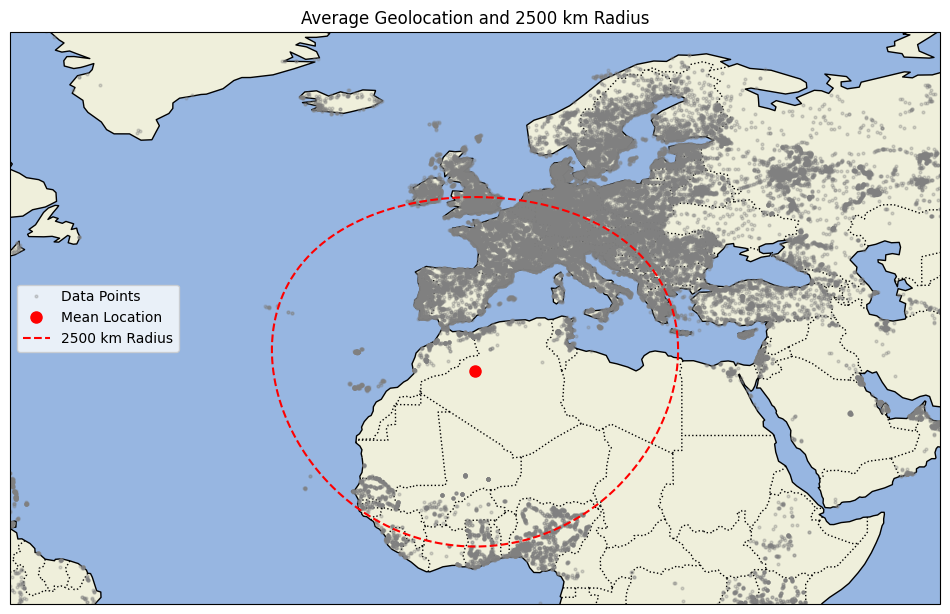

In [25]:
# Compute the mean location
mean_lat = combined_df['latitude'].mean()
mean_lon = combined_df['longitude'].mean()
print(f"Mean Location: ({mean_lat:.2f}, {mean_lon:.2f})")

# Function to compute a circle around the mean point
def generate_circle(lat, lon, radius_km, num_points=360):
    angles = np.linspace(0, 360, num_points)
    circle_lats = []
    circle_lons = []
    for angle in angles:
        # Use geopy to compute points at a given distance and bearing
        point = distance(kilometers=radius_km).destination((lat, lon), angle)
        circle_lats.append(point.latitude)
        circle_lons.append(point.longitude)
    return circle_lons, circle_lats

circle_lon, circle_lat = generate_circle(mean_lat, mean_lon, radius_km=2500)

# Plot
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([mean_lon - 60, mean_lon + 60, mean_lat - 30, mean_lat + 30])

# Plot points
ax.plot(combined_df['longitude'], combined_df['latitude'], 'o', color='gray', alpha=0.3, markersize=2, label='Data Points')

# Plot mean point
ax.plot(mean_lon, mean_lat, 'ro', markersize=8, label='Mean Location')

# Plot 2500 km circle
ax.plot(circle_lon, circle_lat, 'r--', label='2500 km Radius')

plt.legend()
plt.title("Average Geolocation and 2500 km Radius")
plot_path = r"D:\4999 Data\plots\mean_location"
plt.savefig(plot_path, bbox_inches='tight')
plt.show()

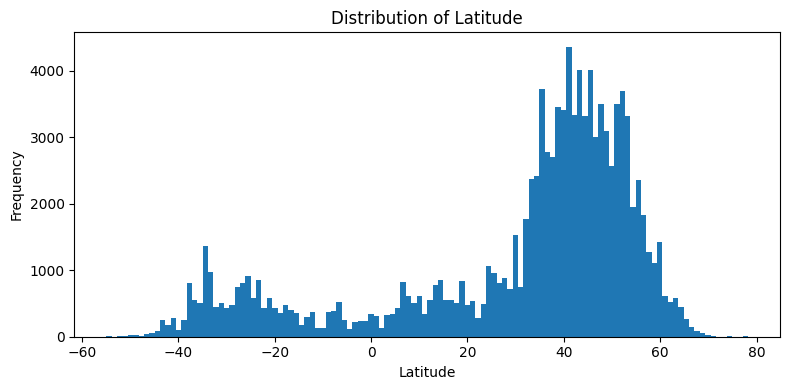

In [20]:
# Plot latitude distribution
plt.figure(figsize=(8, 4))
plt.hist(combined_df['latitude'], bins='auto')
plt.title('Distribution of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.tight_layout()
plot_path = r"D:\4999 Data\plots\latitude_hist"
plt.savefig(plot_path)
plt.show()

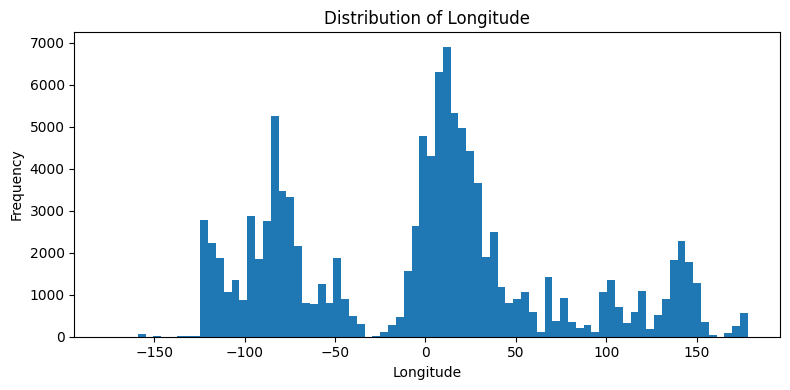

In [21]:
# Plot longitude distribution
plt.figure(figsize=(8, 4))
plt.hist(combined_df['longitude'], bins='auto')
plt.title('Distribution of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.tight_layout()
plot_path = r"D:\4999 Data\plots\longitude_hist"
plt.savefig(plot_path)
plt.show()